In [89]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import datetime          as dt

%matplotlib inline

In [94]:
dt.datetime.now().year - 2011

7

In [107]:
variables = [
    'Age',                     # Profile
    'Height',                  # Profile
    'Weight',                  # Profile
    'Open Appearances',        # Profile
    'Regional Appearances',    # Profile
    'Games Appearances',       # Profile
    'Team Series Appearances', # Profile
    'Back Squat',              # Weightlifting
    'Clean & Jerk',
    'Snatch',
    'Deadlift',
    'Fight Gone Bad',
    'Max Pullups',             # Gymnastics
    'Fran',                    # Endurance?
    'Grace',
    'Helen',
    'Filthy 50',
    'Sprint 400m',
    'Run 5k',
]

curr_year = dt.datetime.now().year

ranges = [
    (0, 100),               # Age                    
    (0,  96),               # Height (inches)                 
    (0, 300),               # Weight (lbs)                
    (0, curr_year - 2011),  # Open Appearances (since 2011)    
    (0, curr_year - 2011),  # Regional Appearance (since 2011)
    (0, curr_year - 2007),  # Games Appearances (since 2007)
    (0, curr_year - 2011),  # Team Series Appearance (since 2011)
    (0, 1268),              # Back Squat (lbs)           
    (0, 586),               # Clean & Jerk (lbs)
    (0, 472),               # Snatch (lbs)
    (0, 1102),              # Deadlift (lbs)
    (0, 500),               # Fight Gone Bad (points)
    (0, 100),               # Max Pullups           
    (510, 0),               # Fran (s)                 
    (720, 0),               # Grace (s)
    (900, 0),               # Helen (s)
    (2400, 0),              # Filthy 50,
    (90,   0),              # Sprint 400m
    (1590, 0),              # Run 5k
]

matt_stats = [
    28,   # Age                    
    67,   # Height                 
    190,  # Weight                 
    5,    # Open Appearances       
    4,    # Regional Appearance   
    3,    # Games Appearances      
    1,    # Team Series Appearance
    485,  # Back Squat             
    375,  # Clean & Jerk
    315,  # Snatch
    500,  # Deadlift
    0,  # Fight Gone Bad (s) !Not recorded!
    50,   # Max Pullups           
    127,  # Fran (s)                 
    78,   # Grace (s)
    900,  # Helen (s)   !Not recorded!
    2400, # Filthy 50   !Not recorded!
    90,   # Sprint 400m !Not recorded!
    1500, # Run 5k      !Not recorded!
]


In [99]:
matt_stats

[28, 67, 190, 5, 4, 3, 1, 485, 375, 315, 500, 0, 50, 127, 78, 0, 0, 0, 0]

## TODO:
> Comment Plot to ensure I know what it does  
> Consider using standardization (zscore?) so that scales are all even (can still report raw score/lifts but will give even scale)

In [83]:
def _invert(x, limits):
    """inverts a value x on a scale from
    limits[0] to limits[1]"""
    return limits[1] - (x - limits[0])

def _scale_data(data, ranges):
    """scales data[1:] to ranges[0],
    inverts if the scale is reversed"""
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        assert (y1 <= d <= y2) or (y2 <= d <= y1)
    x1, x2 = ranges[0]
    d = data[0]
    if x1 > x2:
        d = _invert(d, (x1, x2))
        x1, x2 = x2, x1
    sdata = [d]
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        if y1 > y2:
            d = _invert(d, (y1, y2))
            y1, y2 = y2, y1
        sdata.append((d-y1) / (y2-y1) 
                     * (x2 - x1) + x1)
    return sdata

class ComplexRadar():
    def __init__(self, fig, variables, ranges,
                 n_ordinate_levels=6):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True,
                label = "axes{}".format(i)) 
                for i in range(len(variables))]
        l, text = axes[0].set_thetagrids(angles, 
                                         labels=variables)
        [txt.set_rotation(angle-90) for txt, angle 
             in zip(text, angles)]
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], 
                               num=n_ordinate_levels)
            gridlabel = ["{}".format(round(x,2)) 
                         for x in grid]
            if ranges[i][0] > ranges[i][1]:
                grid = grid[::-1] # hack to invert grid
                          # gridlabels aren't reversed
            gridlabel[0] = "" # clean up origin
            ax.set_rgrids(grid, labels=gridlabel,
                         angle=angles[i])
            #ax.spines["polar"].set_visible(False)
            ax.set_ylim(min(ranges[i]), max(ranges[i]))
        # variables for plotting
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

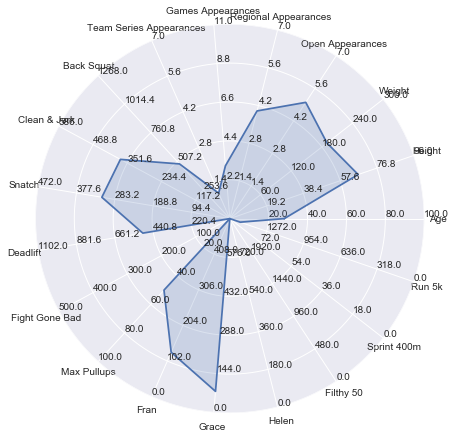

In [108]:
fig1 = plt.figure(figsize=(6, 6))
radar = ComplexRadar(fig1, variables, ranges)
radar.plot(matt_stats)
radar.fill(matt_stats, alpha=0.2)
plt.show()